This notebook is a demo showing how to create, log, and visualize a Comet DataGrid.

If you want to see a final visualization without running the notebook, see:

https://www.comet.com/dsblank/demo-datagrids/view/KgAy7owXoTSxWcBuztlf0RT4R/panels


Otherwise, let's get started. First, we'll install the necessary packages:

In [1]:
%pip install comet_ml cometx datagrid --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 710.5/710.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.7/979.7 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.7/144.7 kB 6.7 MB/s eta 0:00:00


Next, we import all of the needed libraries for the demo:

In [2]:
# For creating, logging, and viewing a DataGrid:
import comet_ml
import cometx
from datagrid import DataGrid, Image

# For image demo:
import random
from PIL import Image as PImage
import requests
from tqdm.notebook import tqdm

Finally, we log into Comet.

In [4]:
comet_ml.login()

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).


For this demo, we will use random images provided by `picsum.photos`. Here is an example of how will will pick some random images:

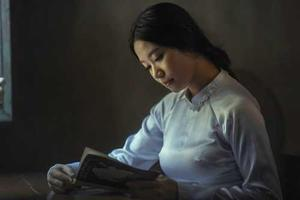

In [5]:
width = 300
height = 200
url = f"https://picsum.photos/{width}/{height}"
PImage.open(requests.get(url, stream=True).raw)

In [6]:
categories = ["sunset", "landscape", "water", "tree", "city"]
items = ["dog", "cat", "bicycle", "human"]

In the following example, we will create a table of Image and numeric data.

To create an Image() you can use any argument that comet_ml.log_image() supports.



### Step 1. Create a Comet experiment

```python
experiment = comet_ml.start()
```

### Step 2. Create a DataGrid

```python
dg = DataGrid(
    columns=["Image", "Score", "Category"],
    name="Demo"
)
```

### Step 3. Append data

If you want to see all of the option for the Image class, you can read the documentation on the `Experiment.log_image()` method, as `Image()` takes example the same arguments:

[Experiment.log_image()](https://www.comet.com/docs/v2/api-and-sdk/python-sdk/reference/Experiment/#comet_ml.Experiment.log_image)

In a loop, append images, and other data:

```python
dg.append(Image(), score, category)
```

In the demo below, we will add annotations to the image. Annotations are composed of layers, and layers can contain `boxes` or `polygons`.

```python
        annotations=[
            comet_ml.Layer(
                boxes=[
                    comet_ml.Box([x, y, w, h], label=label),
                ],
                name="truth",
            ),
        ],
 ```

### Step 4. Log the DataGrid to the experiment.

And finally, log the dg to the experiment. This will automatically log the images and DataGrid as assets.


```python
dg.log(experiment)
```

In [7]:
experiment = comet_ml.start(
    project_name="demo-datagrids"
)
dg = DataGrid(
    columns=["Image", "Score", "Category"],
    name="Demo"
)

for i in tqdm(range(50)):
    im = PImage.open(requests.get(url, stream=True).raw)
    category = random.choice(categories)
    score = random.random()

    label = random.choice(items)
    x = random.randint(1, width - 10)
    y = random.randint(1, height - 10)
    w = max(random.randint(10, width - x), 10)
    h = max(random.randint(10, height - y), 10)
    image = Image(
        im,
        metadata={"category": category, "score": score},
        annotations=[
            comet_ml.Layer(
                boxes=[
                    comet_ml.Box([x, y, w, h], label=label),
                ],
                name="truth",
            ),
        ],
    )
    dg.append([image, score, category])

dg.log(experiment)
experiment.end()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/dsblank/demo-datagrids/1e8648d193a54f4ab55ea99e5b03851d



  0%|          | 0/50 [00:00<?, ?it/s]

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : verbal_apple_2583
COMET INFO:     url                   : https://www.comet.com/dsblank/demo-datagrids/1e8648d193a54f4ab55ea99e5b03851d
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=1yt7q6MpWIyORPDe4leYr2_5gH5woCuuE
COMET INFO:   Uploads:
COMET INFO:     datagrid            : 1 (2.91 KB)
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     images              : 50
COMET INFO:     installed packages  : 1
CO

The `DataGrid` can then be viewed in Comet with the "Data Grid Viewer". To view it, we first need to upload the Comet Python Panel to your workspace. (You only need to do this once.)

In [ ]:
cometx.upload_panel("DataGridViewer")

You can go straight to the experiment view by clicking the link in the experiment output above. The URL is:

In [9]:
print(experiment.url)

https://www.comet.com/dsblank/demo-datagrids/1e8648d193a54f4ab55ea99e5b03851d


You can also open up the experiment view inside this notebook:

In [ ]:
experiment.display()

### Add the DataGidViewer to your Experiment View


1. Click on the add panel "Add panel"
2. Select the "Workspace" tab
3. Select "DataGridViewer"
4. Click on "Add >"
5. Click on "Done"
6. Resize the Panel to be wide and long
7. Select your DataGrid from the selection box



Your view should look similar to the following:

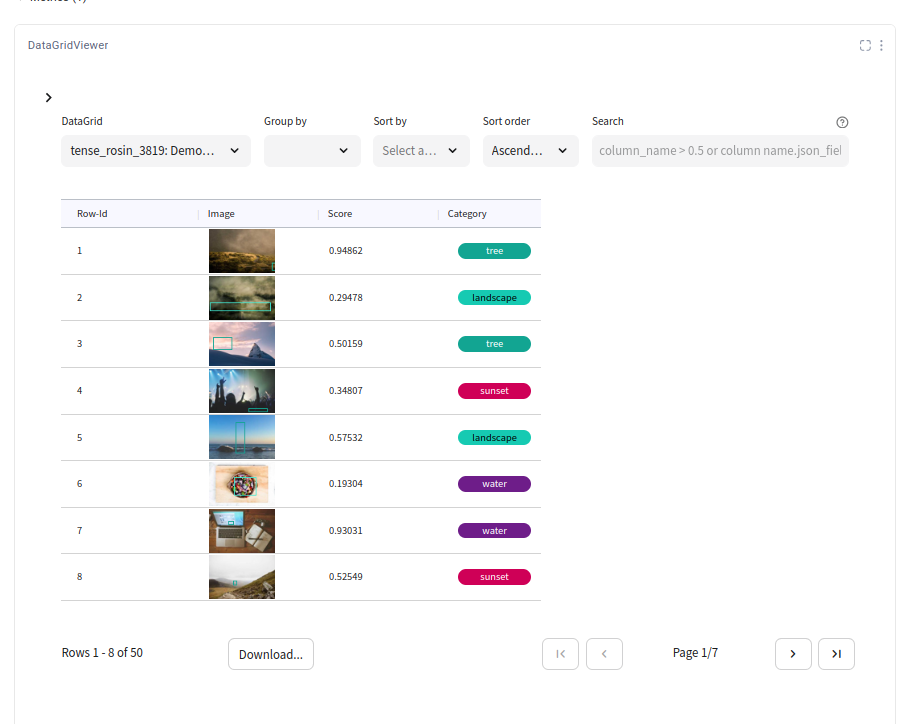

In the DataGridView Panel there are many things you can do to better understand your data.

### Click on an Image

If you click on an image, you will see the image, metadata, and annotations. Note that the labels and metadata can be queried on in the Search (below). For example, `image.metadata.category == "tree"` and `image.labels.dog`. This dialog also provides a way to go directly to the image in the Comet Graphics tab.

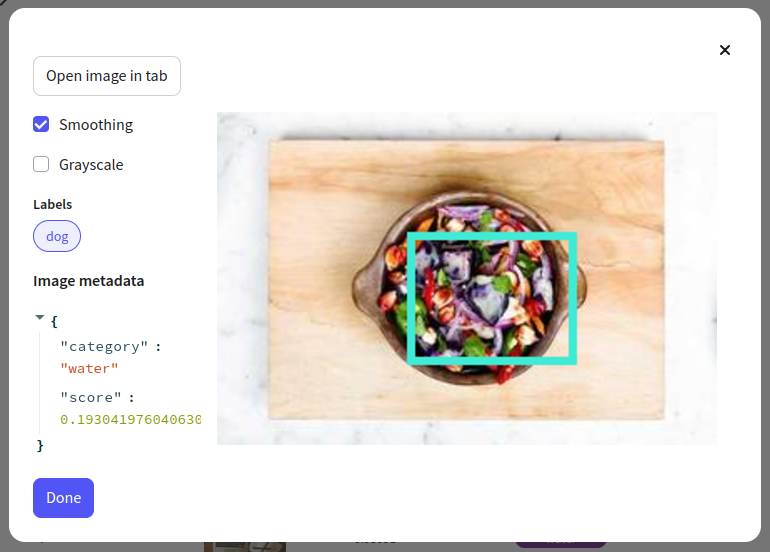



### Group by

The "Group by" is perhaps the most powerful feature in the DataGridViewer. You can group by any category or value, and the other columns will show:

1. Histograms for numeric and category columns
2. Image grouping for image columns

In any histogram (category or numeric) you can select the bar (using box or lasso) and that will set the search to filter the data to only those items.

### Sort by, and sort order

You can change the sort order (in grouped and un-grouped) views.

### Search

The Search expression is very powerful, allowing you to query on image metadata, annotation labels, combined with comparisons on other columns. In addition, you use Python syntax (including list comprehension) for complex queries.

For more details on the Search options, see:

https://github.com/dsblank/datagrid/blob/main/Search.md

There are many other possible uses of `datagrid`! If you have questions or comments, let us know:

https://chat.comet.com/